### Q1.What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
### Sol. The fundamental idea behind ensemble techniques is to combine multiple individual models (often called “weak learners”) to form a single, stronger model that improves overall performance, stability, and accuracy.

#### Bagging (Bootstrap Aggregating)
* Approach:
  * Builds multiple independent models (usually of the same type, e.g., decision trees).
  * Each model is trained on a randomly sampled subset (with replacement) of the training data → called a bootstrap sample.
  * Final prediction is made by averaging (for regression) or majority voting (for classification).

* Objective:
  * To reduce variance and prevent overfitting.
  * Works best with high-variance, low-bias models (like decision trees).

*  Example: Random Forest is a classic example of bagging.

#### Boosting
* Approach:
  * Builds models sequentially, where each new model tries to correct the errors made by the previous ones.
  * More weight is given to misclassified or poorly predicted samples in the next iteration.
  * The models are combined in a weighted manner to form the final prediction.

*  Objective:
   * To reduce bias and improve model accuracy.
   * Focuses on making a strong model from many weak learners.

* Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM.

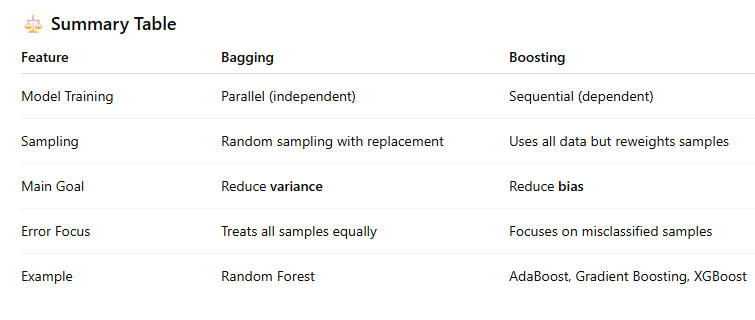

### Q2. Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
### Sol. A Random Forest is an ensemble of many decision trees built using bagging (bootstrap aggregation) and feature randomness.

It reduces overfitting by introducing diversity among trees.

Here's how:
1. Bootstrap Sampling (Bagging)
* Each tree is trained on a different random subset of the training data (sampled with replacement).
* So, each tree sees a slightly different view of the data.
* The errors of individual trees cancel out when averaged (or voted).

This reduces variance and helps prevent overfitting.

2. Random Feature Selection
* At each node, the algorithm randomly selects a subset of features to consider for splitting.
* This ensures not all trees rely on the same dominant features.

This decorrelates the trees, making the ensemble more robust and less likely to overfit.

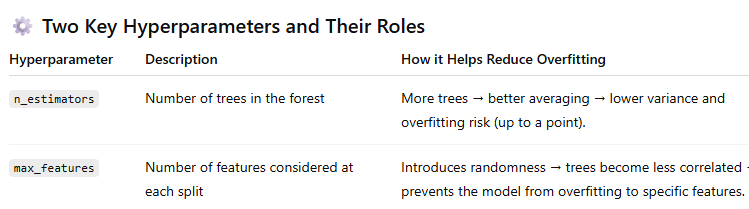

### Q3.What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
### Sol.
Stacking is an ensemble learning technique that combines multiple different types of models (level-0 models) and uses another meta-model (level-1 model) to learn how best to combine their predictions.

In simple terms:

Instead of just averaging predictions (like bagging) or correcting errors (like boosting), stacking trains a new model to learn how to combine the strengths of several models.

#### How Stacking Works
1. Train base models (Level-0 models):
    * Train several diverse models on the same dataset (e.g., Decision Tree, Logistic Regression, SVM, Random Forest).
    * Each model makes its own predictions.

2. Generate meta-features:
    * Collect predictions from all base models as new input features.

3. Train a meta-model (Level-1 model):
    * Train another model (often a simple one like Linear Regression or Logistic Regression) using these predictions as inputs.
    * This meta-model learns how to best weight or combine the base models’ predictions.


How Stacking Differs from Bagging and Boosting -


 | Feature                | **Bagging**                                | **Boosting**                                     | **Stacking**                                    |
| ---------------------- | ------------------------------------------ | ------------------------------------------------ | ----------------------------------------------- |
| **Model Diversity**    | Usually same model type (e.g., many trees) | Same weak learner sequentially                   | Different model types (e.g., SVM + RF + NN)     |
| **Training Style**     | Parallel (independent models)              | Sequential (each model corrects previous errors) | Parallel for base models, then train meta-model |
| **Combination Method** | Averaging or voting                        | Weighted sum (based on model performance)        | Learns combination via a meta-model             |
| **Goal**               | Reduce variance                            | Reduce bias                                      | Combine strengths of different models           |


### Q4.What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
### Sol.
OOB Score (Out-of-Bag Score) is an internal validation score for Random Forests that estimates model performance without using a separate validation or test set.

It leverages the bootstrap sampling process used during training.

#### How It Works
1. Bootstrap Sampling in Random Forest:
   * Each decision tree in the forest is trained on a random sample (with replacement) of the training data.
   * Typically, each tree sees about 63–67% of the total training data.
   * The remaining ~33% of data is not used for training that tree — these samples are called Out-of-Bag (OOB) samples.

2. OOB Evaluation:
   * After the forest is trained, each tree makes predictions on its own OOB samples.
   * For each training example, collect all the predictions made by trees for which that example was OOB.
   * The majority vote (classification) or average (regression) of those predictions is compared to the true label.

3. OOB Score Calculation:
   * The OOB Score is the overall accuracy (for classification) or R² (for regression) computed using these OOB predictions.


Why the OOB Score is Useful

   | Advantage                                    | Explanation                                                                                                                               |
| -------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| **1. No Need for a Separate Validation Set** | Since OOB samples serve as a built-in test set, you don’t need to split your data — this saves data, especially when datasets are small.  |
| **2. Unbiased Performance Estimate**         | The OOB score is based on data *not seen by the model* during training — giving an **honest estimate of generalization performance**.     |
| **3. Automatic Cross-Validation**            | Each data point is tested multiple times across different trees (as OOB), making the OOB score similar to **cross-validation** in spirit. |


### Q5.Compare AdaBoost and Gradient Boosting in terms of:
 * How they handle errors from weak learners
 * Weight adjustment mechanism
 * Typical use cases
### Sol. Here's a comparison of AdaBoost and Gradient Boosting:

##### 1. How They Handle Errors from Weak Learners :

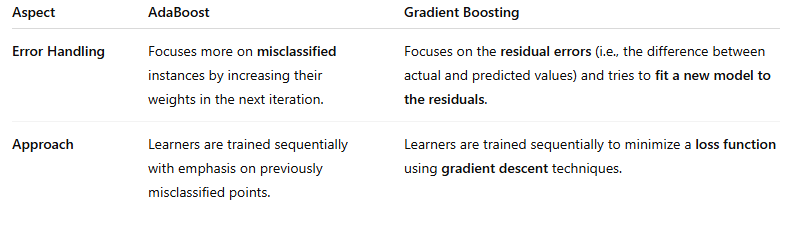

2. Weight Adjustment Mechanism

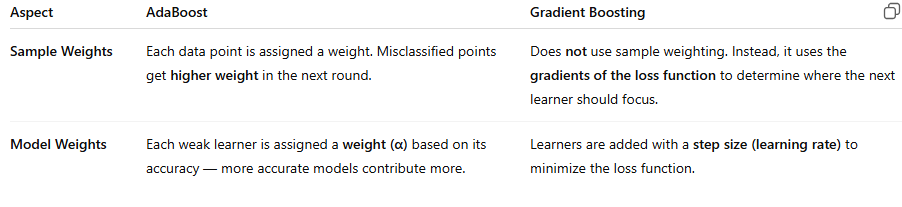

3. Typical Use Cases

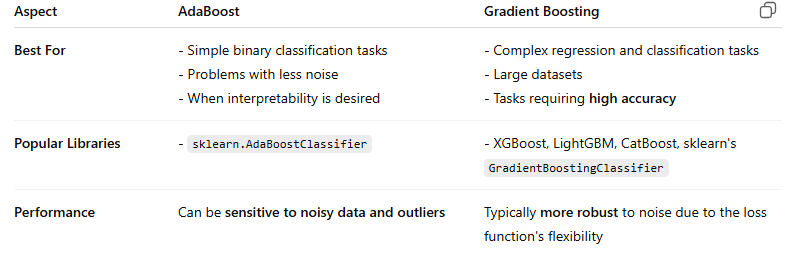

##### Summary Table

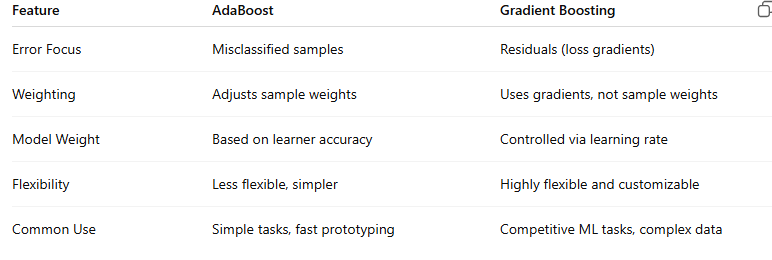

### Q6. Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
### Sol. CatBoost performs well on categorical features without extensive preprocessing because it has a built-in mechanism to handle them directly, unlike most algorithms that require one-hot encoding or label encoding.

##### Here's how CatBoost handles categorical variables:

1. Target-Based (Mean) Encoding with Permutation:
   * CatBoost converts categorical features into numerical values using target statistics — for example, the average target value for each category.
   * To prevent target leakage, CatBoost applies this encoding in an ordered (permuted) way — meaning that when computing the statistic for a data point, it only uses information from previous examples in the training order.

2. Combinations of Categorical Features:
   * CatBoost also creates combinations of categorical features automatically to capture interactions between them, further improving model performance.

3. Efficient Encoding during Training:
   * All this is done internally and efficiently, avoiding the explosion in feature space that happens with one-hot encoding.

##### In short:
CatBoost's use of ordered target-based encoding and automatic feature combinations allows it to natively and effectively learn from categorical data, eliminating the need for manual preprocessing.

### Q7.KNN Classifier Assignment: Wine Dataset Analysis with Optimization

##### Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [2]:
# Step 1: Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Step 2: Load dataset
data = load_wine()
X, y = data.data, data.target

# Step 3: Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Train KNN without scaling
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

# Step 5: Evaluate without scaling
print("=== Without Scaling ===")
acc_default = accuracy_score(y_test, y_pred_default)
print("Accuracy:", acc_default)
print("\nClassification Report:\n", classification_report(y_test, y_pred_default))

# Step 6: Apply StandardScaler and retrain
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Step 7: Evaluate with scaling
print("\n=== With StandardScaler ===")
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy:", acc_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))

# Step 8: GridSearchCV for optimization
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Step 9: Best parameters and evaluation
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)

print("\n=== GridSearchCV Results ===")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
print("\nTest Accuracy with Best Model:", acc_best)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Step 10: Compare all models
results = pd.DataFrame({
    'Model': ['KNN (Unscaled)', 'KNN (Scaled)', 'KNN (Optimized)'],
    'Accuracy': [acc_default, acc_scaled, acc_best]
})

print("\n=== Model Comparison ===")
print(results.to_string(index=False))


=== Without Scaling ===
Accuracy: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== With StandardScaler ===
Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== GridSearchCV Results ===
Best Parameters: {'metric': 'euclidean', 'n_nei

### Q8. PCA + KNN with Variance Analysis and Visualization
##### Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

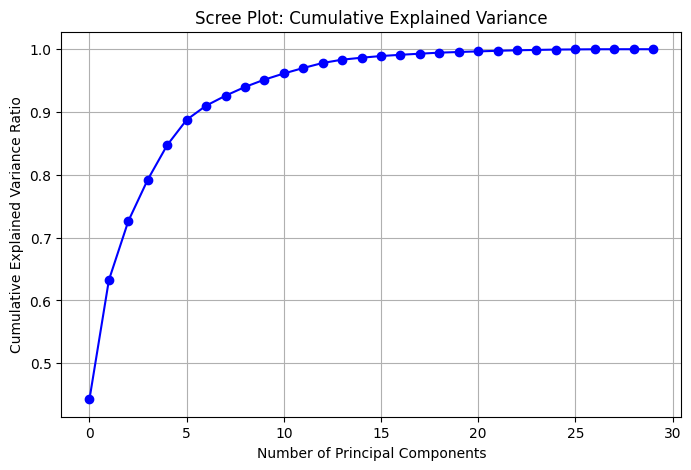

Number of components to retain 95% variance: 10

=== KNN Accuracy Comparison ===
Original Data Accuracy: 0.9708
PCA (95% variance) Data Accuracy: 0.9474


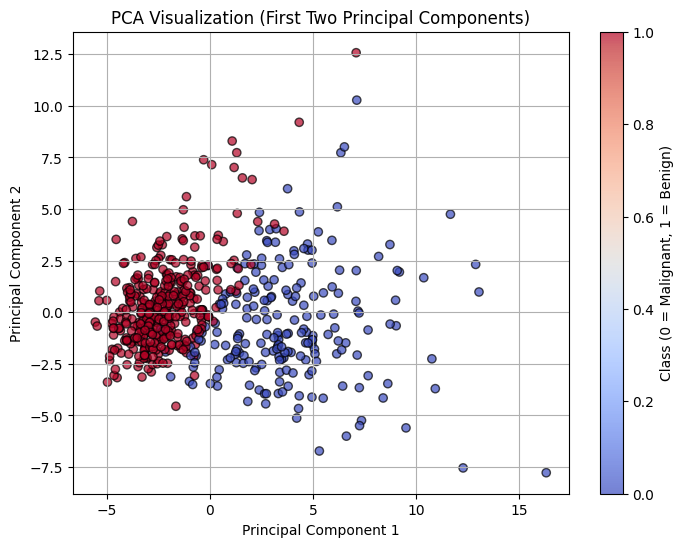

In [3]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Step 3: Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA without specifying components (to analyze variance)
pca_full = PCA()
pca_full.fit(X_scaled)

# Step 5: Plot Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', color='b')
plt.title('Scree Plot: Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Step 6: Retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)
print(f"Number of components to retain 95% variance: {pca_95.n_components_}")

# Step 7: Split data (train/test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Step 8: Train KNN on original data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# Step 9: Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Step 10: Compare Accuracy
print("\n=== KNN Accuracy Comparison ===")
print(f"Original Data Accuracy: {acc_original:.4f}")
print(f"PCA (95% variance) Data Accuracy: {acc_pca:.4f}")

# Step 11: Visualize First Two Principal Components
pca_2 = PCA(n_components=2)
X_2d = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('PCA Visualization (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.grid(True)
plt.show()


### Q9.KNN Regressor with Distance Metrics and K-Value Analysis

Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
   * a. Euclidean distance (K=5)
   * b. Manhattan distance (K=5)
   * c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

=== KNN Regressor MSE Comparison (K=5) ===
Euclidean Distance MSE : 4989.29
Manhattan Distance MSE : 5558.44


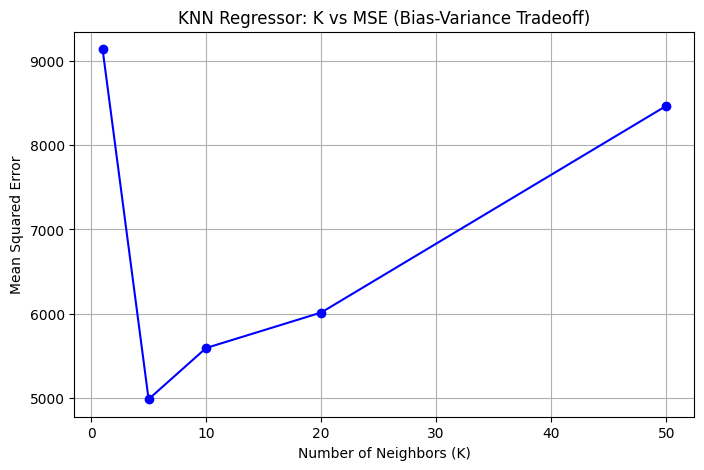


=== Interpretation ===
• Small K (e.g., K=1) → Low bias, high variance (overfitting).
• Large K (e.g., K=50) → High bias, low variance (underfitting).
• Optimal K lies in middle range where MSE is minimum.


In [4]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 2: Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# Step 3: Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Scale features (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5a: KNN Regressor (K=5, Euclidean distance)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Step 5b: KNN Regressor (K=5, Manhattan distance)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# Step 6: Print MSE comparison
print("=== KNN Regressor MSE Comparison (K=5) ===")
print(f"Euclidean Distance MSE : {mse_euclidean:.2f}")
print(f"Manhattan Distance MSE : {mse_manhattan:.2f}")

# Step 7: K-value analysis (bias-variance tradeoff)
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Step 8: Plot K vs MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', color='b')
plt.title('KNN Regressor: K vs MSE (Bias-Variance Tradeoff)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Step 9: Print interpretation summary
print("\n=== Interpretation ===")
print("• Small K (e.g., K=1) → Low bias, high variance (overfitting).")
print("• Large K (e.g., K=50) → High bias, low variance (underfitting).")
print("• Optimal K lies in middle range where MSE is minimum.")


### Q10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data

Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
   * a. Brute-force method
   * b. KD-Tree
   * c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).

Number of missing values before imputation:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Number of missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

=== KNN Algorithm Comparison ===
Algorithm  Accuracy  Training Time (s)
    brute  0.744589           0.002910
  kd_tree  0.744589           0.001408
ball_tree  0.744589           0.001072

Best Performing Algorithm: brute

Top 2 important features used for visualization: ['Glucose', 'Insulin']


<Figure size 800x600 with 0 Axes>

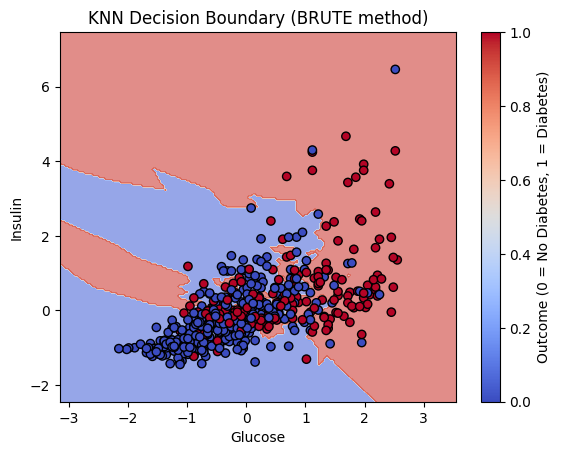

In [8]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# Step 2: Load Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
data = pd.read_csv(url, names=columns)

# Step 3: Identify missing values
# In this dataset, 0 in some columns means "missing" (e.g., Glucose=0 not realistic)
missing_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[missing_cols] = data[missing_cols].replace(0, np.nan)

print("Number of missing values before imputation:")
print(data.isnull().sum())

# Step 4: Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=columns)

print("\nNumber of missing values after imputation:")
print(data_imputed.isnull().sum())

# Step 5: Split data into features and target
X = data_imputed.drop("Outcome", axis=1)
y = data_imputed["Outcome"]

# Step 6: Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 7: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Compare KNN with different algorithms
methods = ['brute', 'kd_tree', 'ball_tree']
results = []

for method in methods:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append((method, acc, train_time))

# Step 9: Display results
results_df = pd.DataFrame(results, columns=["Algorithm", "Accuracy", "Training Time (s)"])
print("\n=== KNN Algorithm Comparison ===")
print(results_df.to_string(index=False))

# Step 10: Select best-performing algorithm
best_algo = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Algorithm"]
print(f"\nBest Performing Algorithm: {best_algo}")

# Step 11: Decision Boundary Visualization (using 2 most important features)
# Let's pick top 2 features based on correlation with target
corr = data_imputed.corr()["Outcome"].abs().sort_values(ascending=False)
top2_features = corr.index[1:3].tolist()
print(f"\nTop 2 important features used for visualization: {top2_features}")

# Prepare data using only top 2 features
X2 = data_imputed[top2_features].values
y2 = data_imputed["Outcome"].values

# Split and scale again
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42, stratify=y2)
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

# Train best KNN model
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X2_train_scaled, y2_train)

# Plot decision boundary
plt.figure(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    knn_best, X2_train_scaled, response_method="predict",
    cmap='coolwarm', alpha=0.6, grid_resolution=200
)
plt.scatter(X2_train_scaled[:, 0], X2_train_scaled[:, 1], c=y2_train, edgecolor='k', cmap='coolwarm')
plt.title(f"KNN Decision Boundary ({best_algo.upper()} method)")
plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.colorbar(label='Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.show()
